In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
dp = pd.read_csv(r'C:\Users\USER\Downloads\employee_survey.csv', sep =',')
dp

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


In [3]:
total = dp.isnull().sum().sort_values(ascending= False)
total

EmpID                    0
Stress                   0
TrainingHoursPerYear     0
haveOT                   0
EduLevel                 0
NumReports               0
TeamSize                 0
NumCompanies             0
CommuteDistance          0
CommuteMode              0
SleepHours               0
Workload                 0
Gender                   0
PhysicalActivityHours    0
WorkEnv                  0
WLB                      0
EmpType                  0
Dept                     0
Experience               0
JobLevel                 0
MaritalStatus            0
Age                      0
JobSatisfaction          0
dtype: int64

# Distibusi Data

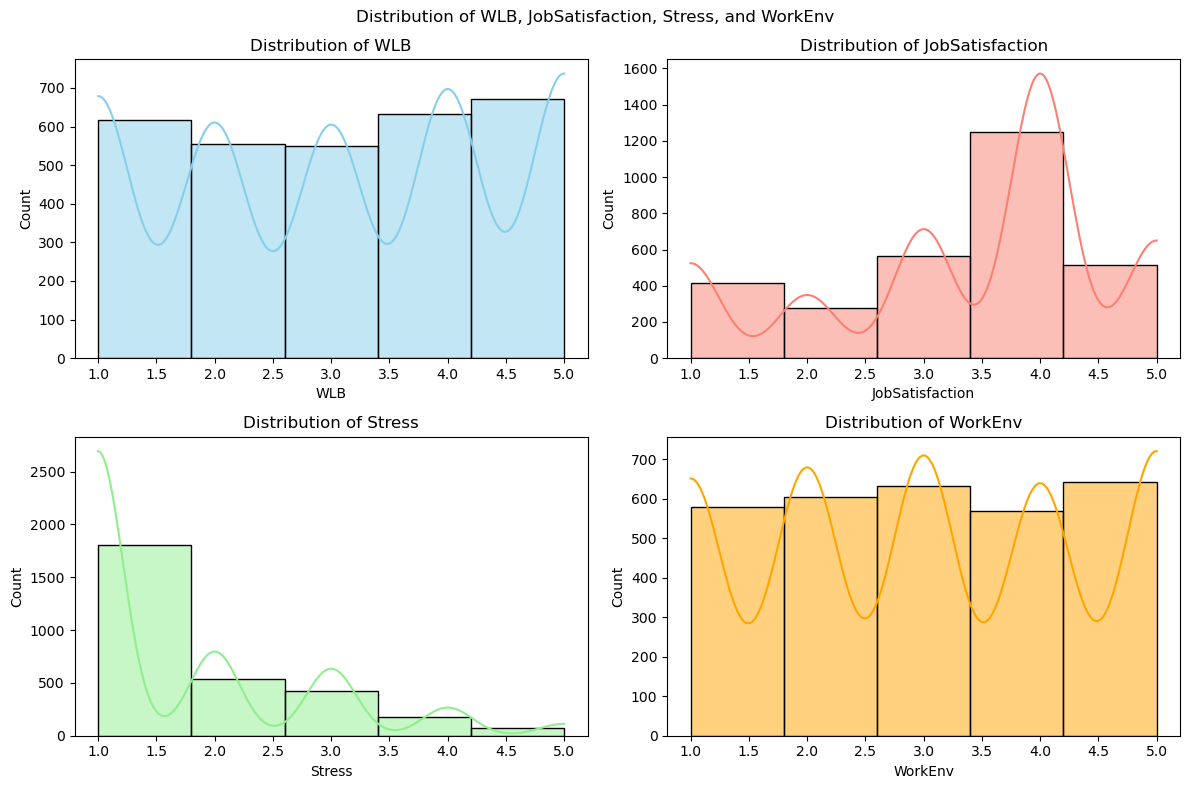

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of WLB, JobSatisfaction, Stress, and WorkEnv")

# Plot untuk WLB
sns.histplot(dp['WLB'], bins=5, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of WLB")

# Plot untuk JobSatisfaction
sns.histplot(dp['JobSatisfaction'], bins=5, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribution of JobSatisfaction")

# Plot untuk Stress
sns.histplot(dp['Stress'], bins=5, kde=True, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Distribution of Stress")

# Plot untuk WorkEnv
sns.histplot(dp['WorkEnv'], bins=5, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of WorkEnv")

plt.tight_layout()
plt.show()


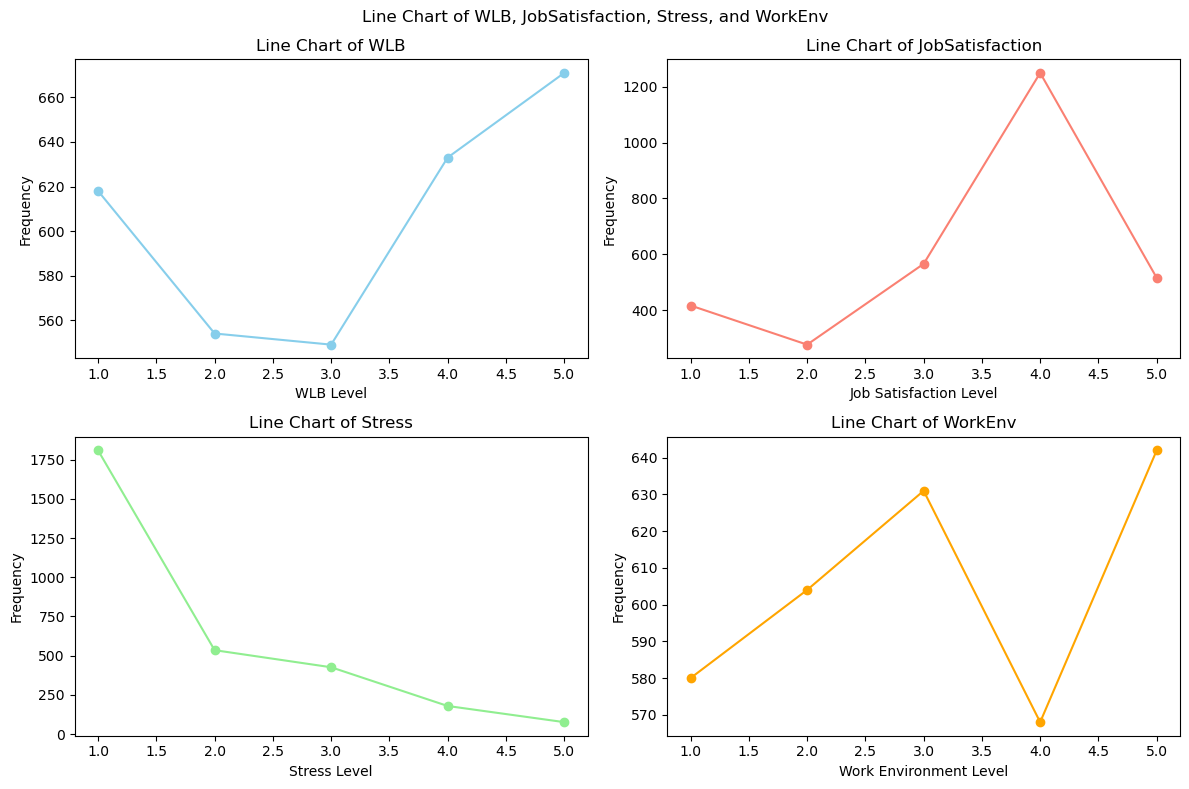

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Line Chart of WLB, JobSatisfaction, Stress, and WorkEnv")

# Menghitung frekuensi untuk setiap kolom
wlb_counts = dp['WLB'].value_counts().sort_index()
jobsat_counts = dp['JobSatisfaction'].value_counts().sort_index()
stress_counts = dp['Stress'].value_counts().sort_index()
workenv_counts = dp['WorkEnv'].value_counts().sort_index()

# Line chart untuk WLB
axes[0, 0].plot(wlb_counts.index, wlb_counts.values, marker='o', color="skyblue")
axes[0, 0].set_title("Line Chart of WLB")
axes[0, 0].set_xlabel("WLB Level")
axes[0, 0].set_ylabel("Frequency")

# Line chart untuk JobSatisfaction
axes[0, 1].plot(jobsat_counts.index, jobsat_counts.values, marker='o', color="salmon")
axes[0, 1].set_title("Line Chart of JobSatisfaction")
axes[0, 1].set_xlabel("Job Satisfaction Level")
axes[0, 1].set_ylabel("Frequency")

# Line chart untuk Stress
axes[1, 0].plot(stress_counts.index, stress_counts.values, marker='o', color="lightgreen")
axes[1, 0].set_title("Line Chart of Stress")
axes[1, 0].set_xlabel("Stress Level")
axes[1, 0].set_ylabel("Frequency")

# Line chart untuk WorkEnv
axes[1, 1].plot(workenv_counts.index, workenv_counts.values, marker='o', color="orange")
axes[1, 1].set_title("Line Chart of WorkEnv")
axes[1, 1].set_xlabel("Work Environment Level")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Korelasi

In [6]:
df = dp[['WLB', 'JobSatisfaction', 'Stress', 'WorkEnv']]

In [7]:
correlation = df.corr(method='pearson')
correlation

,WLB,JobSatisfaction,Stress,WorkEnv
WLB,1.000000,0.259687,0.003595,0.005751
JobSatisfaction,0.259687,1.000000,-0.214383,0.248730
Stress,0.003595,-0.214383,1.000000,-0.013791
WorkEnv,0.005751,0.248730,-0.013791,1.000000


<Axes: >

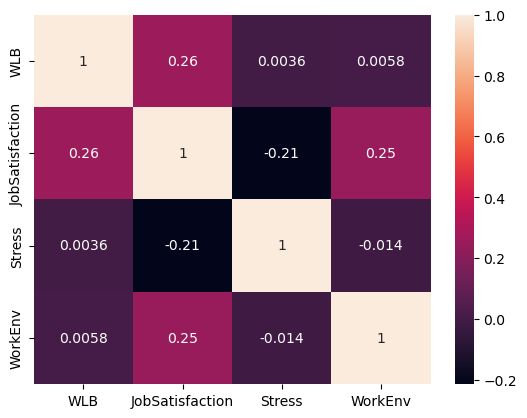

In [8]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)


In [9]:
import pandas as pd
from scipy.stats import spearmanr

# Variabel independen
independent_vars = ['WLB', 'Stress', 'WorkEnv']

# Variabel dependen
dependent_var = 'JobSatisfaction'

# Menghitung korelasi Spearman untuk setiap variabel independen dengan dependen
spearman_results = {}
for var in independent_vars:
    coef, p_value = spearmanr(df[var], df[dependent_var])
    spearman_results[var] = {'Spearman Coefficient': coef, 'p-value': p_value}

# Menampilkan hasil
results_df = pd.DataFrame(spearman_results).T
print(results_df)

'''Kesimpulan : WLB memiliki koefisien: 0.249 yang artinya Korelasi positif lemah antara Work-Life Balance dan JobSatisfaction, dengan p-value 4.91 × 10^-44 (p < 0.05), yang artinya varibel independent signifikan terhadap dependent.
Stress memiliki Koefisien: -0.195 yang artinya korelasi negatif lemah antara Stress dan JobSatisfaction, dengan p-value: 3.55 × 10^-27 signifikan (p < 0.05).
WorkEnv (Work Environment) memiliki Koefisien: 0.250 yang artinya Korelasi positif lemah antara Work Environment dan JobSatisfaction, dengan 1.87 × 10^-44 (p < 0.05).'''


         Spearman Coefficient       p-value
WLB                  0.249161  4.908041e-44
Stress              -0.194515  3.549503e-27
WorkEnv              0.250355  1.866996e-44


'Kesimpulan : WLB memiliki koefisien: 0.249 yang artinya Korelasi positif lemah antara Work-Life Balance dan JobSatisfaction, dengan p-value 4.91 × 10^-44 (p < 0.05), yang artinya varibel independent signifikan terhadap dependent.\nStress memiliki Koefisien: -0.195 yang artinya korelasi negatif lemah antara Stress dan JobSatisfaction, dengan p-value: 3.55 × 10^-27 signifikan (p < 0.05).\nWorkEnv (Work Environment) memiliki Koefisien: 0.250 yang artinya Korelasi positif lemah antara Work Environment dan JobSatisfaction, dengan 1.87 × 10^-44 (p < 0.05).'

# Ordinal Model 

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Misalkan kita sudah memiliki DataFrame df
# Definisikan variabel independen dan dependen
x = dp[['WLB', 'Stress', 'WorkEnv']]
y = dp['JobSatisfaction']

# Inisialisasi model regresi logistik ordinal tanpa menambahkan konstanta
model = OrderedModel(y, x, distr='logit')
ordinal_logit = model.fit()

# Tampilkan hasil
print(ordinal_logit.summary())


                             OrderedModel Results                             
Dep. Variable:        JobSatisfaction   Log-Likelihood:                -4178.4
Model:                   OrderedModel   AIC:                             8371.
Method:            Maximum Likelihood   BIC:                             8413.
Date:                Wed, 27 Nov 2024                                         
Time:                        21:34:52                                         
No. Observations:                3025                                         
Df Residuals:                    3018                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WLB            0.3223      0.024     13.574      0.000       0.276       0.369
Stress        -0.3688      0.032    -11.455      0.0

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print("Interpretasi: Keseimbangan Kerja-Hidup (WLB) memiliki pengaruh positif yang signifikan terhadap kepuasan kerja. "
      "Dengan koefisien sebesar 0,3223 dan nilai p yang sangat kecil (0,000), dapat diinterpretasikan bahwa semakin baik "
      "keseimbangan antara kerja dan kehidupan pribadi, maka semakin tinggi tingkat kepuasan kerja karyawan.\n\n"
      
      "Stres (Stress) memiliki pengaruh negatif yang signifikan terhadap kepuasan kerja. Koefisien sebesar -0,3688 dengan "
      "nilai p signifikan menunjukkan bahwa semakin tinggi tingkat stres, semakin rendah tingkat kepuasan kerja. Ini berarti "
      "bahwa stres yang lebih tinggi dapat mengurangi kepuasan karyawan terhadap pekerjaan mereka.\n\n"
      
      "Lingkungan Kerja (WorkEnv) juga memiliki pengaruh positif yang signifikan terhadap kepuasan kerja, dengan koefisien "
      "sebesar 0,3966 dan nilai p yang sangat kecil (0,000). Ini menunjukkan bahwa lingkungan kerja yang lebih baik "
      "(misalnya, fasilitas yang nyaman, hubungan baik dengan rekan kerja) berkaitan dengan peningkatan kepuasan kerja.\n\n"
      
      "Thresholds (Cutpoints) digunakan untuk menentukan batasan antara level-level kepuasan kerja. Seperti, "
      "nilai 1/2, 2/3, 3/4, dan 4/5 adalah titik potong yang membedakan antara kategori-kategori kepuasan kerja. Nilai ini "
      "menunjukkan bagaimana tingkat kepuasan kerja diklasifikasikan berdasarkan variabel independent dalam model.\n\n"
      
      "Secara keseluruhan, model ini menunjukkan bahwa keseimbangan kerja-hidup yang baik dan lingkungan kerja yang positif "
      "cenderung meningkatkan kepuasan kerja, sementara stres yang lebih tinggi cenderung menurunkan kepuasan kerja.")


# likelihood ratio test (LRT)

In [13]:
from scipy.stats import chi2

# Pastikan model telah di-fit
result = model.fit()

# Log-likelihood dari model penuh dan model null
log_likelihood_full = result.llf  # Log-likelihood dari model penuh
log_likelihood_null = result.llnull  # Log-likelihood dari model null

# Hitung likelihood ratio statistic (LRT)
lrt_statistic = 2 * (log_likelihood_full - log_likelihood_null)

# Derajat kebebasan adalah jumlah prediktor dalam model
df = result.df_model

# Hitung nilai p-value berdasarkan distribusi chi-square
p_value = chi2.sf(lrt_statistic, df)

# Output hasil
print(f"LRT Statistic: {lrt_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Tolak H0: Model dengan prediktor signifikan secara keseluruhan.")
else:
    print("Gagal menolak H0: Model dengan prediktor tidak signifikan secara keseluruhan.")


LRT Statistic: 552.327333140096
P-value: 2.175033801577793e-119
Tolak H0: Model dengan prediktor signifikan secara keseluruhan.


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Misalkan DataFrame sudah ada (df)
# Definisikan variabel independen dan dependen
x = dp[['WLB', 'Stress', 'WorkEnv']]  # Variabel independen
y = dp['JobSatisfaction']             # Variabel dependen

# Uji Z Manual
coefficients = ordinal_logit.params  # Koefisien dari model
std_errors = ordinal_logit.bse       # Standar error dari model

# Hitung z-statistik
z_values = coefficients / std_errors

# Hitung p-value (dua sisi)
from scipy.stats import norm
p_values = 2 * (1 - norm.cdf(abs(z_values)))

# Menampilkan hasil
print("\nHasil Uji Z:")
for var, coef, std_err, z, p in zip(x.columns, coefficients, std_errors, z_values, p_values):
    print(f"Variabel: {var}")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  Standard Error: {std_err:.4f}")
    print(f"  Z-value: {z:.4f}")
    print(f"  P-value: {p:.4f}")
    print("  Signifikan" if p < 0.05 else "  Tidak Signifikan")
    print()



Hasil Uji Z:
Variabel: WLB
  Coefficient: 0.3223
  Standard Error: 0.0237
  Z-value: 13.5735
  P-value: 0.0000
  Signifikan

Variabel: Stress
  Coefficient: -0.3688
  Standard Error: 0.0322
  Z-value: -11.4548
  P-value: 0.0000
  Signifikan

Variabel: WorkEnv
  Coefficient: 0.3966
  Standard Error: 0.0245
  Z-value: 16.1875
  P-value: 0.0000
  Signifikan



In [32]:
from mord import OrdinalRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Pilih variabel independen dan dependen
independent_vars = ['WLB', 'Stress', 'WorkEnv']
dependent_var = 'JobSatisfaction'

X = dp[independent_vars]  # Variabel independen
y = dp[dependent_var]     # Variabel dependen

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model regresi logistik ordinal menggunakan OrdinalRidge
ordinal_model = OrdinalRidge(alpha=1.0)  # Inisialisasi model dengan regularisasi alpha=1.0
ordinal_model.fit(X_train, y_train)      # Latih model dengan data training

# Prediksi hasil untuk data testing
y_pred = ordinal_model.predict(X_test)

# Evaluasi model menggunakan classification report
classification_report_result = classification_report(y_test, y_pred)

# Tampilkan hasil classification report
print("Classification Report (OrdinalRidge):")
print(classification_report_result)


Classification Report (OrdinalRidge):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       134
           2       0.04      0.02      0.03        88
           3       0.22      0.60      0.33       163
           4       0.50      0.57      0.54       360
           5       0.00      0.00      0.00       163

    accuracy                           0.34       908
   macro avg       0.15      0.24      0.18       908
weighted avg       0.24      0.34      0.27       908



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

In [36]:
# Kesimpulan hasil Classification Report
kesimpulan = """
Kesimpulan:

1. Accuracy = 0.34
   - Hanya 34% dari keseluruhan prediksi yang benar.
   - Ini menunjukkan performa keseluruhan model sangat rendah.

2. Macro Avg (F1-score = 0.18)
   - Rata-rata performa antar kelas sangat rendah.
   - Model tidak bekerja baik di sebagian besar kelas.

3. Weighted Avg (F1-score = 0.27)
   - Rata-rata berbobot juga rendah.
   - Hal ini mencerminkan bahwa distribusi kelas yang tidak seimbang (imbalanced) memengaruhi performa model.
"""

print(kesimpulan)



Kesimpulan:

1. Accuracy = 0.34
   - Hanya 34% dari keseluruhan prediksi yang benar.
   - Ini menunjukkan performa keseluruhan model sangat rendah.

2. Macro Avg (F1-score = 0.18)
   - Rata-rata performa antar kelas sangat rendah.
   - Model tidak bekerja baik di sebagian besar kelas.

3. Weighted Avg (F1-score = 0.27)
   - Rata-rata berbobot juga rendah.
   - Hal ini mencerminkan bahwa distribusi kelas yang tidak seimbang (imbalanced) memengaruhi performa model.



In [33]:
import numpy as np
from scipy.stats import f
from mord import OrdinalRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Variabel independen dan dependen
X = dp[['WLB', 'Stress', 'WorkEnv']]
y = dp['JobSatisfaction']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model OrdinalRidge
model = OrdinalRidge(alpha=1.0)
model.fit(X_train, y_train)

# Prediksi untuk data train
y_pred = model.predict(X_train)

# Hitung R-squared untuk model
ss_total = np.sum((y_train - np.mean(y_train))**2)  # Total Sum of Squares
ss_residual = np.sum((y_train - y_pred)**2)         # Residual Sum of Squares
r_squared_model = 1 - (ss_residual / ss_total)      # R-squared untuk model

# R-squared untuk model null (hanya rata-rata, tanpa variabel independen)
y_null_pred = np.mean(y_train)
ss_residual_null = np.sum((y_train - y_null_pred)**2)
r_squared_null = 1 - (ss_residual_null / ss_total)

# Degree of freedom
df_model = X_train.shape[1]  # Jumlah variabel independen
df_resid = len(y_train) - df_model - 1  # Degree of freedom residuals

# Hitung F-statistic
f_stat = ((r_squared_model - r_squared_null) / df_model) / ((1 - r_squared_model) / df_resid)

# Nilai F-tabel
alpha = 0.05
f_tabel = f.ppf(1 - alpha, df_model, df_resid)

# Menampilkan hasil uji F
print(f"F hitung (F-statistic): {f_stat}")
print(f"F tabel: {f_tabel}")

# Kesimpulan uji F
if f_stat > f_tabel:
    print("Tolak H0: Terdapat hubungan yang signifikan antara variabel independen dan JobSatisfaction.")
else:
    print("Gagal menolak H0: Tidak ditemukan bukti hubungan signifikan.")


F hitung (F-statistic): 123.52218338919691
F tabel: 2.6091140231178773
Tolak H0: Terdapat hubungan yang signifikan antara variabel independen dan JobSatisfaction.


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


# Uji z 

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Define variabel dependen dan independen
dependent = dp['JobSatisfaction']  # Variabel dependen ordinal
independent = dp[['WLB', 'Stress', 'WorkEnv']]  # Variabel independen

# Membuat OrderedModel
model = OrderedModel(dependent, independent, distr='logit')  # 'probit' bisa digunakan sebagai alternatif
result = model.fit(method='bfgs')

# Ringkasan hasil
print(result.summary())

# Uji Z: Coefficient / Std Error
# H0: Koefisien variabel = 0 (tidak ada pengaruh signifikan)
# H1: Koefisien variabel ≠ 0 (pengaruh signifikan)

z_scores = result.params / result.bse  # Z-scores
p_values = result.pvalues  # P-values dari hasil fitting

print("\nUji Z dan P-Values:")
for var, z, p in zip(result.params.index, z_scores, p_values):
    print(f"Variable: {var}, Z-Score: {z:.3f}, P-Value: {p:.3g}")


Optimization terminated successfully.
         Current function value: 1.380355
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
                             OrderedModel Results                             
Dep. Variable:        JobSatisfaction   Log-Likelihood:                -4175.6
Model:                   OrderedModel   AIC:                             8365.
Method:            Maximum Likelihood   BIC:                             8407.
Date:                Wed, 27 Nov 2024                                         
Time:                        22:11:57                                         
No. Observations:                3025                                         
Df Residuals:                    3018                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [34]:
from scipy.stats import norm

# Data dari model
coefficients = result.params  # Koefisien
std_errors = result.bse       # Standard errors
alpha = 0.05                  # Tingkat signifikansi

# Menghitung z-score (z hitung) untuk setiap variabel
z_scores = coefficients / std_errors

# Z tabel (z kritis) untuk tingkat signifikansi alpha
z_critical = norm.ppf(1 - alpha / 2)  # Z tabel dua sisi

# Menampilkan hasil uji z
print(f"Z tabel (Z kritis): ±{z_critical:.3f}")
print("\nHasil Uji Z untuk masing-masing variabel:")

for var, coef, se, z in zip(result.params.index, coefficients, std_errors, z_scores):
    print(f"Variable: {var}")
    print(f"  Koefisien: {coef:.4f}")
    print(f"  Standard Error: {se:.4f}")
    print(f"  Z hitung: {z:.3f}")
    
    # Interpretasi berdasarkan perbandingan Z hitung dan Z tabel
    if abs(z) > z_critical:
        print("  Kesimpulan: Tolak H0 (variabel signifikan)")
    else:
        print("  Kesimpulan: Gagal menolak H0 (variabel tidak signifikan)")
    print()


Z tabel (Z kritis): ±1.960

Hasil Uji Z untuk masing-masing variabel:
Variable: WLB
  Koefisien: 0.3574
  Standard Error: 0.0238
  Z hitung: 14.988
  Kesimpulan: Tolak H0 (variabel signifikan)

Variable: Stress
  Koefisien: -0.3891
  Standard Error: 0.0323
  Z hitung: -12.063
  Kesimpulan: Tolak H0 (variabel signifikan)

Variable: WorkEnv
  Koefisien: 0.3563
  Standard Error: 0.0244
  Z hitung: 14.602
  Kesimpulan: Tolak H0 (variabel signifikan)

Variable: 1/2
  Koefisien: -0.5340
  Standard Error: 0.1247
  Z hitung: -4.282
  Kesimpulan: Tolak H0 (variabel signifikan)

Variable: 2/3
  Koefisien: -0.3721
  Standard Error: 0.0576
  Z hitung: -6.458
  Kesimpulan: Tolak H0 (variabel signifikan)

Variable: 3/4
  Koefisien: -0.0141
  Standard Error: 0.0391
  Z hitung: -0.361
  Kesimpulan: Gagal menolak H0 (variabel tidak signifikan)

Variable: 4/5
  Koefisien: 0.7711
  Standard Error: 0.0254
  Z hitung: 30.326
  Kesimpulan: Tolak H0 (variabel signifikan)



In [44]:
import numpy as np
from scipy.stats import norm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mord import OrdinalRidge

# Pilih variabel independen dan dependen
independent_vars = ['WLB', 'Stress', 'WorkEnv']
dependent_var = 'JobSatisfaction'

X = dp[independent_vars]  # Variabel independen
y = dp[dependent_var]     # Variabel dependen

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model regresi logistik ordinal menggunakan OrdinalRidge
ordinal_model = OrdinalRidge(alpha=1.0)  # Inisialisasi model dengan regularisasi alpha=1.0
ordinal_model.fit(X_train, y_train)      # Latih model dengan data training

# Prediksi hasil untuk data testing
y_pred = ordinal_model.predict(X_test)

# Evaluasi model menggunakan classification report
classification_report_result = classification_report(y_test, y_pred)

# Tampilkan hasil classification report
print("Classification Report (OrdinalRidge):")
print(classification_report_result)

# Dapatkan koefisien dari OrdinalRidge
coefficients = ordinal_model.coef_[0]  # Koefisien prediktor

# Bootstrapping untuk mengestimasi standar error
n_bootstrap = 1000
bootstrap_coeffs = []

# Lakukan bootstrap pada data
for _ in range(n_bootstrap):
    X_resampled, y_resampled = resample(X_train, y_train)
    model_resampled = OrdinalRidge(alpha=1.0)
    model_resampled.fit(X_resampled, y_resampled)
    bootstrap_coeffs.append(model_resampled.coef_[0])

# Hitung standar error dari distribusi bootstrap
bootstrap_coeffs = np.array(bootstrap_coeffs)
std_errors = bootstrap_coeffs.std(axis=0)

# Hitung nilai Z-statistik
z_values = coefficients / std_errors

# Hitung p-value
p_values = 2 * (1 - norm.cdf(np.abs(z_values)))  # Dua sisi

# Tampilkan hasil uji z untuk setiap koefisien
print("\nHasil Uji Z untuk Koefisien:")
for i, feature in enumerate(independent_vars):
    print(f"Feature: {feature}")
    print(f"  Coefficient: {coefficients[i]:.4f}")
    print(f"  Std Error: {std_errors[i]:.4f}")
    print(f"  Z-value: {z_values[i]:.4f}")
    print(f"  P-value: {p_values[i]:.4f}")
    print()

# Menentukan kesimpulan uji z berdasarkan alpha
alpha = 0.05
print("Kesimpulan Uji Z:")
for i, feature in enumerate(independent_vars):
    if p_values[i] < alpha:
        print(f"  {feature}: Signifikan (Tolak H0, p-value = {p_values[i]:.4f})")
    else:
        print(f"  {feature}: Tidak signifikan (Gagal tolak H0, p-value = {p_values[i]:.4f})")

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

Classification Report (OrdinalRidge):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       134
           2       0.04      0.02      0.03        88
           3       0.22      0.60      0.33       163
           4       0.50      0.57      0.54       360
           5       0.00      0.00      0.00       163

    accuracy                           0.34       908
   macro avg       0.15      0.24      0.18       908
weighted avg       0.24      0.34      0.27       908


Hasil Uji Z untuk Koefisien:
Feature: WLB


IndexError: invalid index to scalar variable.

In [49]:
import numpy as np
from scipy.stats import norm

# Koefisien model
coefficients = ordinal_model.coef_[0]  # Koefisien untuk setiap variabel independen

# Perkiraan residual untuk mendekati standar error
y_train_pred = ordinal_model.predict(X_train)
residuals = y_train - y_train_pred  # Selisih antara nilai aktual dan prediksi
residual_var = np.var(residuals)    # Varians residual
X_train_std = np.std(X_train, axis=0)  # Standar deviasi setiap fitur (variabel independen)

# Perkiraan standar error
std_errors = np.sqrt(residual_var / (len(X_train) * X_train_std**2))

# Hitung Z-value dan P-value
z_values = coefficients / std_errors
p_values = 2 * (1 - norm.cdf(np.abs(z_values)))

# Hasil dalam bentuk tabel
features = X_train.columns
results = []
for i in range(len(features)):
    result = {
        "Feature": features[i],
        "Coefficient": coefficients[i],
        "Std Error": std_errors[i],
        "Z-value": z_values[i],
        "P-value": p_values[i],
        "Conclusion": "Significant (Reject H0)" if p_values[i] < 0.05 else "Not significant (Fail to reject H0)"
    }
    results.append(result)

# Tampilkan hasil dalam bentuk tabel
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


IndexError: invalid index to scalar variable.

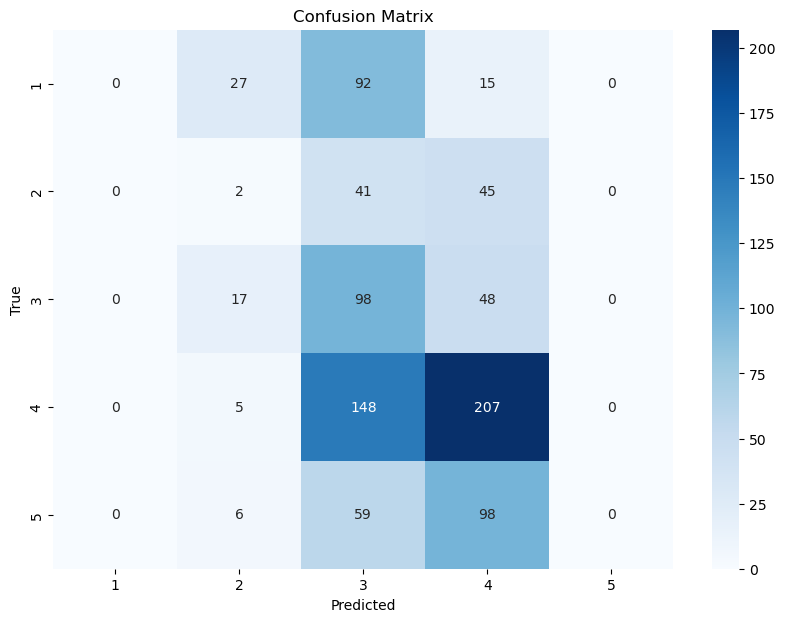

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()